In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import numpy as np
import seaborn as sns

#### Computational Trees and Structural Entropy

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


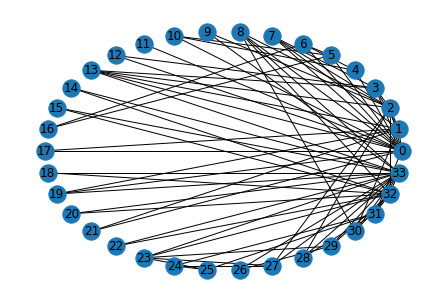

In [34]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [35]:
nodes = list(G.nodes())

In [50]:
computation_trees = []

for node in tqdm(nodes):
    ego = nx.Graph()
    ego = nx.ego_graph(G, node, radius=2)
    #G_temp = nx.Graph()
    #neighbours_node = list(G.neighbors(0))
    #G_temp.add_edges_from([(node,neighbor) for neighbor in neighbours_node])
    computation_trees.append(ego)

100%|██████████| 34/34 [00:00<00:00, 231.99it/s]


In [51]:
def get_structural_entropy(G): # Ref: https://ojs.aaai.org/index.php/AAAI/article/view/28679
    d = list([d for n,d in G.degree()])
    volume = sum(d)
    structural_entropy = -sum([(x/volume) * np.log2(x/volume) for x in d])
    return structural_entropy

In [52]:
computation_tree_entropy = [get_structural_entropy(g) for g in computation_trees]

/Users/student/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

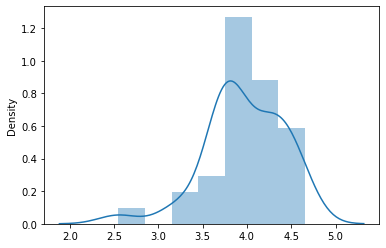

In [53]:
sns.distplot(computation_tree_entropy)

#### Removing Edges

In [58]:
g0 = computation_trees[0]

In [59]:
g0.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (19, 33), (24, 25), (24, 27), (24, 31), (25, 31), (27, 33), (28, 31), (28, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

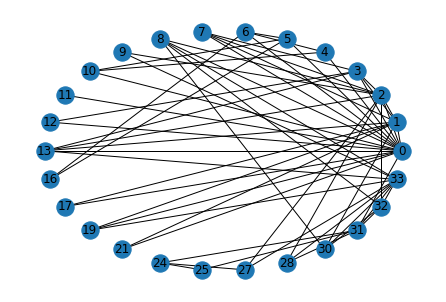

In [55]:
nx.draw_circular(g0, with_labels=True) ##. Plot as a tree
plt.show()

In [56]:
get_structural_entropy(g0)

4.402509766143363

In [57]:
for edge in g0.edges():
    g1 = g0.copy()
    g1.remove_edge(edge[0],edge[1])
    g1.remove_node(edge[1])
    print('Removed edge and entropy: ', edge, get_structural_entropy(g1))

Removed edge and entropy:  (0, 1) 4.311007010746013
Removed edge and entropy:  (0, 2) 4.32872477333266
Removed edge and entropy:  (0, 3) 4.334757459955329
Removed edge and entropy:  (0, 4) 4.338567432309884
Removed edge and entropy:  (0, 5) 4.315368019398221
Removed edge and entropy:  (0, 6) 4.315368019398222
Removed edge and entropy:  (0, 7) 4.361908160114255
Removed edge and entropy:  (0, 8) 4.351411465512317
Removed edge and entropy:  (0, 10) 4.338567432309884
Removed edge and entropy:  (0, 11) 4.381609561042158
Removed edge and entropy:  (0, 12) 4.364829033252302
Removed edge and entropy:  (0, 13) 4.3659920819067395
Removed edge and entropy:  (0, 17) 4.370348248016255
Removed edge and entropy:  (0, 19) 4.365876807541685
Removed edge and entropy:  (0, 21) 4.370348248016255
Removed edge and entropy:  (0, 31) 4.311877333262853
Removed edge and entropy:  (1, 2) 4.32872477333266
Removed edge and entropy:  (1, 3) 4.334757459955329
Removed edge and entropy:  (1, 7) 4.361908160114255
Remov